In [1]:
import pandas as pd
df = pd.read_csv('../Data/TSLA.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-01-03,1.789333,1.800000,1.726667,1.774667,1.774667,19245000
1,2011-01-04,1.777333,1.796667,1.734667,1.778000,1.778000,17811000
2,2011-01-05,1.765333,1.793333,1.746000,1.788667,1.788667,21700500
3,2011-01-06,1.788667,1.866667,1.787333,1.858667,1.858667,30918000
4,2011-01-07,1.866667,1.905333,1.860000,1.882667,1.882667,33718500


In [2]:
df['Date'] = pd.to_datetime(df['Date'])

In [3]:
print(df['Date'].dtype)

datetime64[ns]


In [4]:
df['month_num'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year
df['day_of_month'] = df['Date'].dt.day

In [5]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,month_num,year,day_of_month
0,2011-01-03,1.789333,1.800000,1.726667,1.774667,1.774667,19245000,1,2011,3
1,2011-01-04,1.777333,1.796667,1.734667,1.778000,1.778000,17811000,1,2011,4
2,2011-01-05,1.765333,1.793333,1.746000,1.788667,1.788667,21700500,1,2011,5
3,2011-01-06,1.788667,1.866667,1.787333,1.858667,1.858667,30918000,1,2011,6
4,2011-01-07,1.866667,1.905333,1.860000,1.882667,1.882667,33718500,1,2011,7


In [6]:
df.drop(columns = ['Date'],inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume,month_num,year,day_of_month
0,1.789333,1.800000,1.726667,1.774667,1.774667,19245000,1,2011,3
1,1.777333,1.796667,1.734667,1.778000,1.778000,17811000,1,2011,4
2,1.765333,1.793333,1.746000,1.788667,1.788667,21700500,1,2011,5
3,1.788667,1.866667,1.787333,1.858667,1.858667,30918000,1,2011,6
4,1.866667,1.905333,1.860000,1.882667,1.882667,33718500,1,2011,7


In [7]:
df.isnull().sum()

Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
month_num       0
year            0
day_of_month    0
dtype: int64

Text(0, 0.5, 'Closing price')

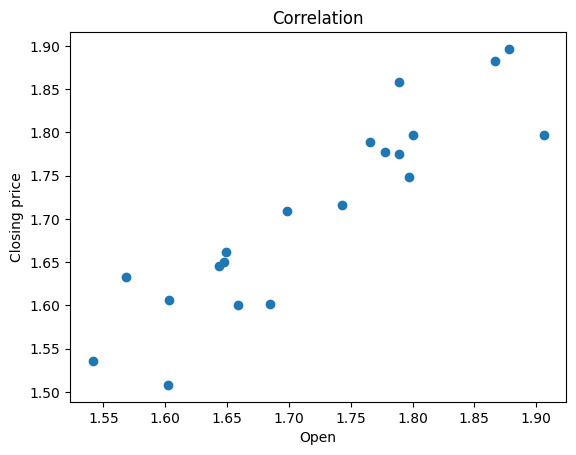

In [8]:
import matplotlib.pyplot as plt
plt.scatter(df['Open'].head(20), df['Close'].head(20))
plt.title('Correlation')
plt.xlabel('Open')
plt.ylabel('Closing price')

In [9]:
X = df.drop(columns=['Close','Adj Close'])
y = df['Close']

In [10]:
X.shape

(3024, 7)

In [11]:
y.shape

(3024,)

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [13]:
scale = StandardScaler()
X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.transform(X_test)

In [14]:
X_train_scaled

array([[-0.57360988, -0.57324855, -0.57622579, ..., -0.44987505,
        -1.02796728,  0.13617864],
       [-0.40129408, -0.37687635, -0.39911606, ...,  0.42426233,
         0.42060675, -0.99605715],
       [-0.46988721, -0.47289112, -0.47311999, ..., -1.0326333 ,
        -0.73825248, -0.31671567],
       ...,
       [-0.45115694, -0.45383827, -0.44929657, ...,  0.1328832 ,
        -0.44853767, -1.67539862],
       [-0.51454644, -0.51019928, -0.51450307, ..., -1.32401242,
        -0.15882286,  1.04196728],
       [-0.49684455, -0.49634024, -0.49419862, ..., -0.15849592,
        -0.73825248, -1.22250431]])

In [15]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train_scaled, y_train)

LinearRegression()

In [16]:
y_pred = reg.predict(X_test_scaled)

In [17]:
from sklearn.metrics import r2_score

score = r2_score(y_test, y_pred)
print('Accuracy of regression model is ', score*100)

Accuracy of regression model is  99.97400188492823


In [18]:
from sklearn.model_selection import KFold,cross_val_score

kf = KFold(n_splits = 10, shuffle=True, random_state=42)
kf.get_n_splits(X_train_scaled)

10

In [19]:
reg_cv = cross_val_score(reg, X_train_scaled,y_train,cv=10,n_jobs=-1, verbose=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    2.3s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.4s finished


In [20]:
print("Score of cross validation :", reg_cv.mean()*100)

Score of cross validation : 99.9693665617147


In [21]:
X_train.head()

,Open,High,Low,Volume,month_num,year,day_of_month
596,6.166667,6.296000,5.833333,285033000,5,2013,17
1911,22.922667,25.830667,22.610001,463137000,8,2018,7
802,16.252666,16.279333,15.600000,93544500,3,2014,13
2210,17.180000,17.333332,16.941334,96492000,10,2019,15
3009,153.440002,160.929993,153.279999,122334500,12,2022,15


In [22]:
y_train.head()

596       6.100000
1911     25.304667
802      15.852667
2210     17.192667
3009    157.669998
Name: Close, dtype: float64

In [23]:
sample_pred = reg.predict([[153.440002,160.929993,153.279999,122334500,12,2024,15]])
print('Prediction :',sample_pred)

Prediction : [7307300.20018563]
